# This is a credit card company dataset:

In [4]:
import os
import pandas as pd
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("/Users/Jayesh/Downloads/credit_history.csv")

# Basic EDA:

In [6]:
df.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,B,2.0,RENT,19200.0,24
1,1,6500,A,2.0,MORTGAGE,66000.0,28
2,0,2400,A,2.0,RENT,60000.0,36
3,0,10000,C,3.0,RENT,62000.0,24
4,1,4000,C,2.0,RENT,20000.0,28


In [7]:
# Looking for the shape of dataset:
df.shape

(7727, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7727 entries, 0 to 7726
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   default    7727 non-null   int64  
 1   amount     7727 non-null   int64  
 2   grade      7727 non-null   object 
 3   years      7448 non-null   float64
 4   ownership  7727 non-null   object 
 5   income     7727 non-null   float64
 6   age        7727 non-null   int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 422.7+ KB


In [9]:
#Checking for null values:
df.isnull().sum()

default        0
amount         0
grade          0
years        279
ownership      0
income         0
age            0
dtype: int64

Observation: years column has null values in the total dataset

In [10]:
df.years.describe()

count    7448.000000
mean        6.086332
std         6.700758
min         0.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        62.000000
Name: years, dtype: float64

Oberservation: Having null values we also checked the stats for years seeing which we indentify there is a skewness in data , because of which we use Median ,i.e. 50% percentile value to replace our null values

In [11]:
df['years'].fillna(4,inplace=True)

In [12]:
df.isnull().sum()

default      0
amount       0
grade        0
years        0
ownership    0
income       0
age          0
dtype: int64

In [13]:
df.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,B,2.0,RENT,19200.0,24
1,1,6500,A,2.0,MORTGAGE,66000.0,28
2,0,2400,A,2.0,RENT,60000.0,36
3,0,10000,C,3.0,RENT,62000.0,24
4,1,4000,C,2.0,RENT,20000.0,28


In [14]:
#Target which we want to predict
y=df.default
y.head()

0    0
1    1
2    0
3    0
4    1
Name: default, dtype: int64

In [15]:
#Creating a dataset of all features which needs to be trained
X=df.drop('default',axis=1)
X.head()

,amount,grade,years,ownership,income,age
0,1000,B,2.0,RENT,19200.0,24
1,6500,A,2.0,MORTGAGE,66000.0,28
2,2400,A,2.0,RENT,60000.0,36
3,10000,C,3.0,RENT,62000.0,24
4,4000,C,2.0,RENT,20000.0,28


In [16]:
#Creating Dummies
X=pd.get_dummies(X)
X.head() 

,amount,years,income,age,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,ownership_MORTGAGE,ownership_OTHER,ownership_OWN,ownership_RENT
0,1000,2.0,19200.0,24,False,True,False,False,False,False,False,False,False,False,True
1,6500,2.0,66000.0,28,True,False,False,False,False,False,False,True,False,False,False
2,2400,2.0,60000.0,36,True,False,False,False,False,False,False,False,False,False,True
3,10000,3.0,62000.0,24,False,False,True,False,False,False,False,False,False,False,True
4,4000,2.0,20000.0,28,False,False,True,False,False,False,False,False,False,False,True


# Modeling with Decesion Tree Classifier:

In [17]:
#Importing the model_selection for train_test_split
import sklearn.model_selection as model_selection

In [18]:
#Creating training and test dataset for modelling :
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2,random_state=99)

In [19]:
#Getting the shape of the training and testing dataset
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

X_train shape: (6181, 15)
y_train shape: (6181,)
X_test shape: (1546, 15)
y_test shape: (1546,)


In [20]:
# Import library for modeling:
import sklearn.tree as tree

In [21]:
#Initializing the decesion tree classifier:
clf= tree.DecisionTreeClassifier(max_depth=3,random_state=99)

In [22]:
#Training decesion_tree:
clf.fit(X_train,y_train)  

DecisionTreeClassifier(max_depth=3, random_state=99)

In [23]:
#Predicted values of X_train dataset
predictions = clf.predict(X_train)
predictions    

array([1, 0, 1, ..., 1, 1, 1])

In [24]:
# Actual values
y_train.head()

4416    1
421     0
1783    0
7240    0
1738    1
Name: default, dtype: int64

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [26]:
#Confusion_matrix
Confu_matrix = confusion_matrix(y_train,predictions)
Confu_matrix

array([[1794, 1451],
       [ 829, 2107]])

In [27]:
#Accuracy on training dataset
Accuracy = accuracy_score(y_train,predictions)
Accuracy

0.6311276492476946

In [28]:
#Predict Test
predict_test = clf.predict(X_test)

In [29]:
predict_test

array([1, 1, 0, ..., 0, 0, 1])

In [30]:
#Actual test values:
y_test.head()

4574    1
4686    1
1991    0
603     1
6364    1
Name: default, dtype: int64

In [31]:
#Confusion_matrix
Confu_matrix = confusion_matrix(y_test,predict_test)
Confu_matrix

array([[451, 334],
       [223, 538]])

In [32]:
# Accuracy on test dataset
Accuracy = accuracy_score(y_test,predict_test)
Accuracy

0.6397153945666235

# Visualization:

In [35]:
#Installing the required libraries
!pip3 install pydotplus
!pip3 install graphviz

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 278 kB 4.9 MB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=25578933656cd11d9e54f431ac6c0cc4db77fc6c81cfe33d1a15f1abedc5bac5
  Stored in directory: /Users/Jayesh/Library/Caches/pip/wheels/89/e5/de/6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 47 kB 2.2 MB/s eta 0:00:01
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.


In [36]:
# Importing the libraries for visualization:
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz
import graphviz
from graphviz import Source

In [38]:
#create the decesion tree as dot file
dot_data = export_graphviz(clf,out_file = None,feature_names=X.columns,filled = True,rounded=True,
           special_characters=True,proportion=True)

In [41]:
#create the graph from dot file
graph = Source(dot_data)

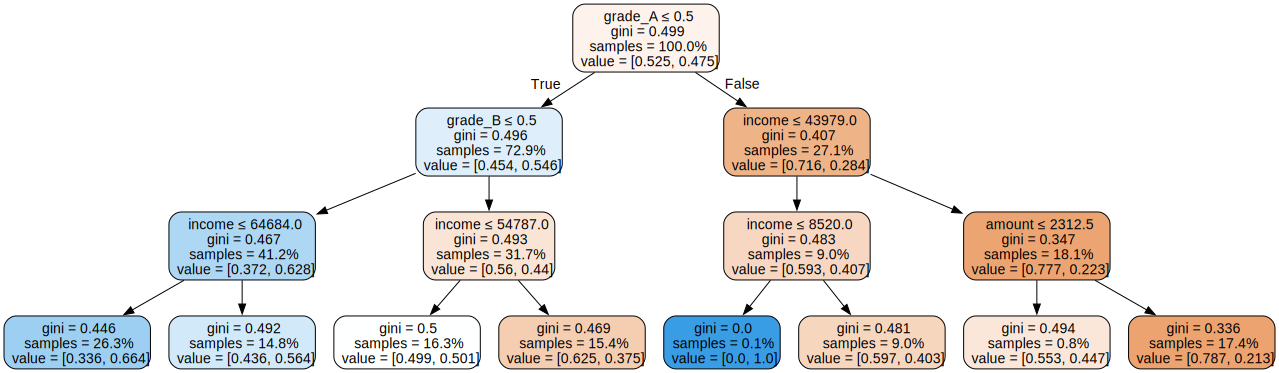

In [43]:
graph

# Grid Search Cross Validation:

In [44]:
mod=model_selection.GridSearchCV(clf,param_grid={'max_depth':[2,3,4,5,6,7,8,9]})

In [45]:
mod.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=3, random_state=99),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9]})

In [46]:
mod.best_estimator_

DecisionTreeClassifier(max_depth=2, random_state=99)

In [47]:
mod.best_score_

0.6301601379263433

In [48]:
mod.best_params_

{'max_depth': 2}